In [1]:
from cortexlib.utils.plotting import plot_mean_fev
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pathlib import Path
import pandas as pd
import json

paths = [
    Path("../../../analysis/mouse_m01_d2/results/simclr_neural_m01_d2.json"),
    Path("../../../analysis/mouse_m02_d3/results/simclr_neural_m02_d3.json"),
    Path("../../../analysis/mouse_m03_d4/results/simclr_neural_m03_d4.json"),
    Path("../../../analysis/mouse_m01_d2/results/vgg19_neural_m01_d2.json"),
    Path("../../../analysis/mouse_m02_d3/results/vgg19_neural_m02_d3.json"),
    Path("../../../analysis/mouse_m03_d4/results/vgg19_neural_m03_d4.json"),
]

all_data = []
for path in paths:
    with open(path, "r") as f:
        data = json.load(f)
        all_data.extend(data)

df = pd.DataFrame(all_data)
df = df.sort_values(["mouse_id", "layer", "n_pcs"], na_position='first').reset_index(drop=True)

print(f"Loaded {len(df)} rows from {len(paths)} files.")
df.head(100)

Loaded 210 rows from 6 files.


,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score
0,vgg19_neural,m01_d2,conv2_2,NaN,0.021,0.129,1.396,1.423,0.114,NaN
1,vgg19_neural,m01_d2,conv2_2,10.0,0.018,0.110,1.396,1.423,0.184,-0.099
2,vgg19_neural,m01_d2,conv2_2,20.0,0.019,0.111,1.396,1.423,0.180,-0.094
3,vgg19_neural,m01_d2,conv2_2,50.0,0.021,0.129,1.396,1.423,0.177,-0.087
4,vgg19_neural,m01_d2,conv2_2,100.0,0.021,0.129,1.396,1.423,0.177,-0.091
...,...,...,...,...,...,...,...,...,...,...
95,simclr_neural,m02_d3,fc,200.0,0.021,0.168,1.704,1.712,0.157,0.107
96,simclr_neural,m02_d3,fc,300.0,0.021,0.169,1.704,1.712,0.157,0.105
97,simclr_neural,m02_d3,fc,400.0,0.021,0.169,1.704,1.712,0.158,0.110
98,simclr_neural,m02_d3,fc,500.0,0.021,0.169,1.704,1.712,0.158,0.084


In [2]:
# Filter to only rows where n_pcs is 100 - standardise
df_pcs = df[(df["n_pcs"] == 100)]
df_pcs

,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score
4,vgg19_neural,m01_d2,conv2_2,100.0,0.021,0.129,1.396,1.423,0.177,-0.091
9,vgg19_neural,m01_d2,conv3_4,100.0,0.018,0.109,1.515,1.462,0.199,-0.056
14,vgg19_neural,m01_d2,conv4_4,100.0,0.019,0.128,1.616,1.645,0.160,0.000
19,vgg19_neural,m01_d2,conv5_4,100.0,0.012,0.099,1.867,1.698,0.122,0.252
24,simclr_neural,m01_d2,fc,100.0,0.024,0.160,1.702,1.711,0.214,0.108
33,vgg19_neural,m01_d2,fc2,100.0,0.010,0.095,1.583,1.589,0.093,0.447
38,simclr_neural,m01_d2,layer1,100.0,0.022,0.114,3.891,4.271,0.225,-0.114
47,simclr_neural,m01_d2,layer2,100.0,0.043,0.178,3.487,3.872,0.233,-0.080
56,simclr_neural,m01_d2,layer3,100.0,0.046,0.172,1.911,1.917,0.245,-0.005
65,simclr_neural,m01_d2,layer4,100.0,0.029,0.132,1.887,1.894,0.193,0.085


In [3]:
# Group by layer and compute mean of each metric
avg_metrics = df_pcs.groupby(["model_target", "layer"]).mean(numeric_only=True).reset_index()
avg_metrics

,model_target,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score
0,simclr_neural,fc,100.0,0.019000,0.121000,1.703000,1.712333,0.174333,0.108
1,simclr_neural,layer1,100.0,0.020333,0.109333,3.820000,4.203000,0.195000,-0.114
2,simclr_neural,layer2,100.0,0.039000,0.178333,3.463333,3.928667,0.209333,-0.080
3,simclr_neural,layer3,100.0,0.041000,0.168333,1.891333,1.896333,0.213333,-0.005
4,simclr_neural,layer4,100.0,0.026000,0.128000,1.882333,1.889333,0.165333,0.085
5,vgg19_neural,conv2_2,100.0,0.016667,0.109333,1.395667,1.421333,0.137000,-0.091
6,vgg19_neural,conv3_4,100.0,0.015000,0.099000,1.517667,1.513000,0.146333,-0.056
7,vgg19_neural,conv4_4,100.0,0.015000,0.121000,1.624000,1.653667,0.118333,0.000
8,vgg19_neural,conv5_4,100.0,0.009667,0.093333,1.791333,1.708667,0.091667,0.252
9,vgg19_neural,fc2,100.0,0.008000,0.091333,1.588000,1.590333,0.070667,0.447


In [4]:
# Get model name
avg_metrics["model"] = avg_metrics["model_target"].str.extract(r"(simclr|vgg19|gabor)")

# RSA: Compute SEM and merge
rsa_sem_df = df_pcs.groupby('layer')['spearman_correlation'].sem().reset_index()
rsa_sem_df.columns = ['layer', 'sem_spearman_correlation']
avg_metrics = avg_metrics.merge(rsa_sem_df, on='layer', how='left')

# FEV: Compute SEM and merge
fev_sem_df = df_pcs.groupby('layer')['mean_fev'].sem().reset_index()
fev_sem_df.columns = ['layer', 'sem_mean_fev']
avg_metrics = avg_metrics.merge(fev_sem_df, on='layer', how='left')

MAX_SEM = 0.005  # or test 0.025, 0.02
avg_metrics['sem_mean_fev_plot'] = avg_metrics['sem_mean_fev'].clip(upper=MAX_SEM)
avg_metrics['sem_spearman_correlation_plot'] = avg_metrics['sem_spearman_correlation'].clip(upper=MAX_SEM)

avg_metrics

,model_target,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,model,sem_spearman_correlation,sem_mean_fev,sem_mean_fev_plot,sem_spearman_correlation_plot
0,simclr_neural,fc,100.0,0.019000,0.121000,1.703000,1.712333,0.174333,0.108,simclr,0.019852,0.020599,0.005000,0.005
1,simclr_neural,layer1,100.0,0.020333,0.109333,3.820000,4.203000,0.195000,-0.114,simclr,0.015275,0.004177,0.004177,0.005
2,simclr_neural,layer2,100.0,0.039000,0.178333,3.463333,3.928667,0.209333,-0.080,simclr,0.012115,0.008950,0.005000,0.005
3,simclr_neural,layer3,100.0,0.041000,0.168333,1.891333,1.896333,0.213333,-0.005,simclr,0.016272,0.009701,0.005000,0.005
4,simclr_neural,layer4,100.0,0.026000,0.128000,1.882333,1.889333,0.165333,0.085,simclr,0.014495,0.009452,0.005000,0.005
5,vgg19_neural,conv2_2,100.0,0.016667,0.109333,1.395667,1.421333,0.137000,-0.091,vgg19,0.020207,0.011552,0.005000,0.005
6,vgg19_neural,conv3_4,100.0,0.015000,0.099000,1.517667,1.513000,0.146333,-0.056,vgg19,0.026333,0.008083,0.005000,0.005
7,vgg19_neural,conv4_4,100.0,0.015000,0.121000,1.624000,1.653667,0.118333,0.000,vgg19,0.020835,0.008544,0.005000,0.005
8,vgg19_neural,conv5_4,100.0,0.009667,0.093333,1.791333,1.708667,0.091667,0.252,vgg19,0.015235,0.006692,0.005000,0.005
9,vgg19_neural,fc2,100.0,0.008000,0.091333,1.588000,1.590333,0.070667,0.447,vgg19,0.011200,0.006333,0.005000,0.005


In [5]:
from scipy.stats import spearmanr

# Loop through each model
for model_name, group in avg_metrics.groupby('model'):
    r, p = spearmanr(group['spearman_correlation'], group['mean_fev'])
    print(f"{model_name}: Spearman r = {r:.3f}, p = {p:.3f}")

simclr: Spearman r = 0.500, p = 0.391
vgg19: Spearman r = 0.600, p = 0.285


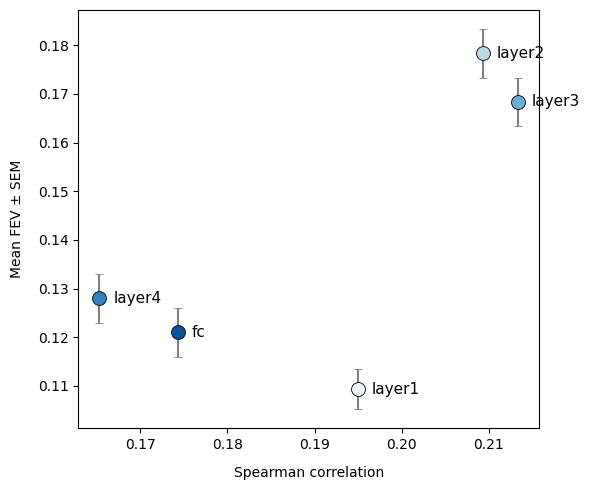

In [18]:
import matplotlib.pyplot as plt
from cortexlib.utils.plotting import simclr_colours

# Filter for SimCLR
df_simclr = avg_metrics[avg_metrics["model"] == "simclr"]

# Plot
plt.figure(figsize=(6, 5))
for _, row in df_simclr.iterrows():
    color = simclr_colours.get(row["layer"], "black")
    plt.errorbar(
        x=row["spearman_correlation"],
        y=row["mean_fev"],
        # xerr=row["sem_spearman_correlation_plot"],
        yerr=row["sem_mean_fev_plot"],
        fmt='o',
        markersize=10,
        capsize=3,
        ecolor='gray',
        color=color,
        markeredgecolor='black',
        markeredgewidth=0.6
    )
    plt.annotate(
        row["layer"],
        xy=(row["spearman_correlation"], row["mean_fev"]),
        xytext=(10, 0),
        textcoords='offset points',
        fontsize=11,
        va='center',
        ha='left',
        # fontweight='bold',
    )

plt.xlabel("Spearman correlation", labelpad=10)
plt.ylabel("Mean FEV ± SEM", labelpad=10)
# plt.grid(True)
plt.tight_layout()
# x_min, x_max = df_simclr["spearman_correlation"].min(), df_simclr["spearman_correlation"].max()
# plt.xlim(x_min - 0.02, x_max + 0.05)

plt.savefig("../bar/figures/fev_vs_rsa_simclr_neural.svg", format='svg')
plt.show()

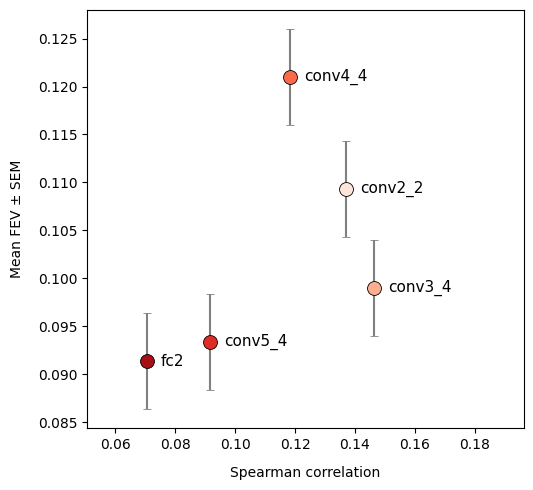

In [7]:
import matplotlib.pyplot as plt
from cortexlib.utils.plotting import vgg19_colours

# Filter for VGG19
df_vgg19 = avg_metrics[avg_metrics["model"] == "vgg19"]

# Plot
plt.figure(figsize=(6, 5))
for _, row in df_vgg19.iterrows():
    color = vgg19_colours.get(row["layer"], "black")
    plt.errorbar(
        x=row["spearman_correlation"],
        y=row["mean_fev"],
        # xerr=row["sem_spearman_correlation_plot"],
        yerr=row["sem_mean_fev_plot"],
        fmt='o',
        markersize=10,
        capsize=3,
        ecolor='gray',
        color=color,
        markeredgecolor='black',
        markeredgewidth=0.6
    )
    plt.annotate(
        row["layer"],
        xy=(row["spearman_correlation"], row["mean_fev"]),
        xytext=(10, 0),
        textcoords='offset points',
        fontsize=11,
        va='center',
        ha='left',
        # fontweight='bold',
    )

plt.xlabel("Spearman correlation", labelpad=10)
plt.ylabel("Mean FEV ± SEM", labelpad=10)
# plt.grid(True)
plt.tight_layout()
x_min, x_max = df_vgg19["spearman_correlation"].min(), df_vgg19["spearman_correlation"].max()
plt.xlim(x_min - 0.02, x_max + 0.05)

plt.savefig("../bar/figures/fev_vs_rsa_vgg19_neural.svg", format='svg')
plt.show()